<a href="https://colab.research.google.com/github/ankitrajmehta/bert-sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import transformers

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

sentiment-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip \*.zip && rm *.zipy

Archive:  sentiment-analysis-dataset.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df = pd.read_csv('/content/train.csv',encoding='unicode_escape')

In [8]:
t = list(df['text'][:200])
y = list(df['sentiment'][:200])

In [9]:
mod_name="cardiffnlp/twitter-roberta-base-sentiment"

In [10]:
classifier = transformers.pipeline(model=mod_name)

In [11]:
res=classifier(t)

In [12]:
res[0]

{'label': 'LABEL_1', 'score': 0.8083176016807556}

In [13]:
com = list(zip([list(d.values())[:][0].lower() for d in res],[list(d.values())[:][1] for d in res]))

In [14]:
per=[list(d.values())[:][1] for d in res]

In [15]:
tet = [list(d.values())[:][0] for d in res]

In [16]:
mapping_dict_ = {'positive': 0, 'neutral': 1, 'negative': 2}
mapping_dict = {'LABEL_2': 0, 'LABEL_1': 1, 'LABEL_0': 2}

In [17]:
y_p = [mapping_dict[element] for element in tet]
y_new = [mapping_dict_[element] for element in y]

In [18]:
misclassified = [i for i, (x, y) in enumerate(zip(y_p, y_new)) if x != y]
len(misclassified),len(y_new)

(51, 200)

In [19]:
classifier(df['text'][20])

[{'label': 'LABEL_1', 'score': 0.4658605754375458}]

In [20]:
df['sentiment'][20]

'neutral'

In [21]:

import matplotlib.pyplot as plt

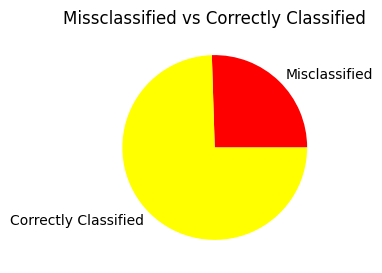

In [22]:
plt.figure(figsize=(3, 3))
plt.pie([len(misclassified), len(y_new)-len(misclassified)], labels=['Misclassified','Correctly Classified'], colors=['red','yellow'])
plt.title('Missclassified vs Correctly Classified')
plt.show()

In [23]:
acc = 1- len(misclassified)/(len(y_new)-len(misclassified))

In [24]:
acc #accuracy

0.6577181208053691